The notebook presents an approach to predict health insurance prices for people with varying attributes. We will try to use multiple models including XGBoost to experiment and find the best one. The source of the dataset is here - https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
# Load libraries
import pandas as pd
import numpy as np


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Data load and exploration

In [5]:
# Read data
df_raw = pd.read_csv("Dataset/insurance.csv")

In [6]:
# Explore data
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# Check the shape of the dataframe
df_raw.shape

(1338, 7)

In [14]:
# Check numerical features stats
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
# Check for missing values
df_raw.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Performing data visualization

In [24]:
# Lets see the distribution of people across the categorical variables
df_raw['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
fig = px.histogram(df_raw, x = 'region', title = "People per region")
fig.show()

We can see that its a fairly uniformly distributed dataset across region


In [25]:
df_raw.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
fig = px.histogram(data_frame = df_raw, x = 'sex', color = 'smoker', title = 'Distribution of sex and smoker')
fig.show()

<Axes: xlabel='region', ylabel='charges'>

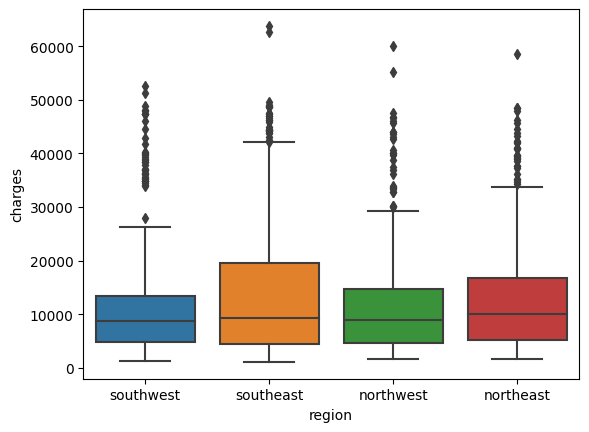

In [32]:
# Lets now visualize the distribution of charges across regions
sns.boxplot(data = df_raw, x = 'region', y = 'charges')

Its evident from above plot that the median charge though is similar across the various regions but the 75th percentile is quite high for southeast region

<Axes: xlabel='region', ylabel='charges'>

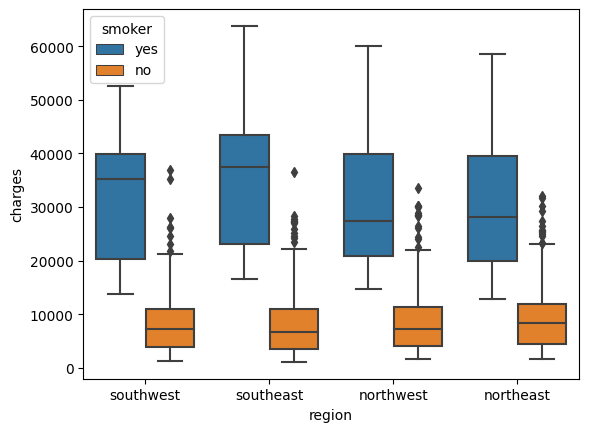

In [34]:
# Lets now add the attribute smoker to the above chart to understand if it has any impact or not
sns.boxplot(data = df_raw, x = 'region', y = 'charges', hue = 'smoker')

We can observe that the median charges for smokers in southeast and southwest is significantly higher compared to the other two regions

In [37]:
# Understanding the correlation between the features
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


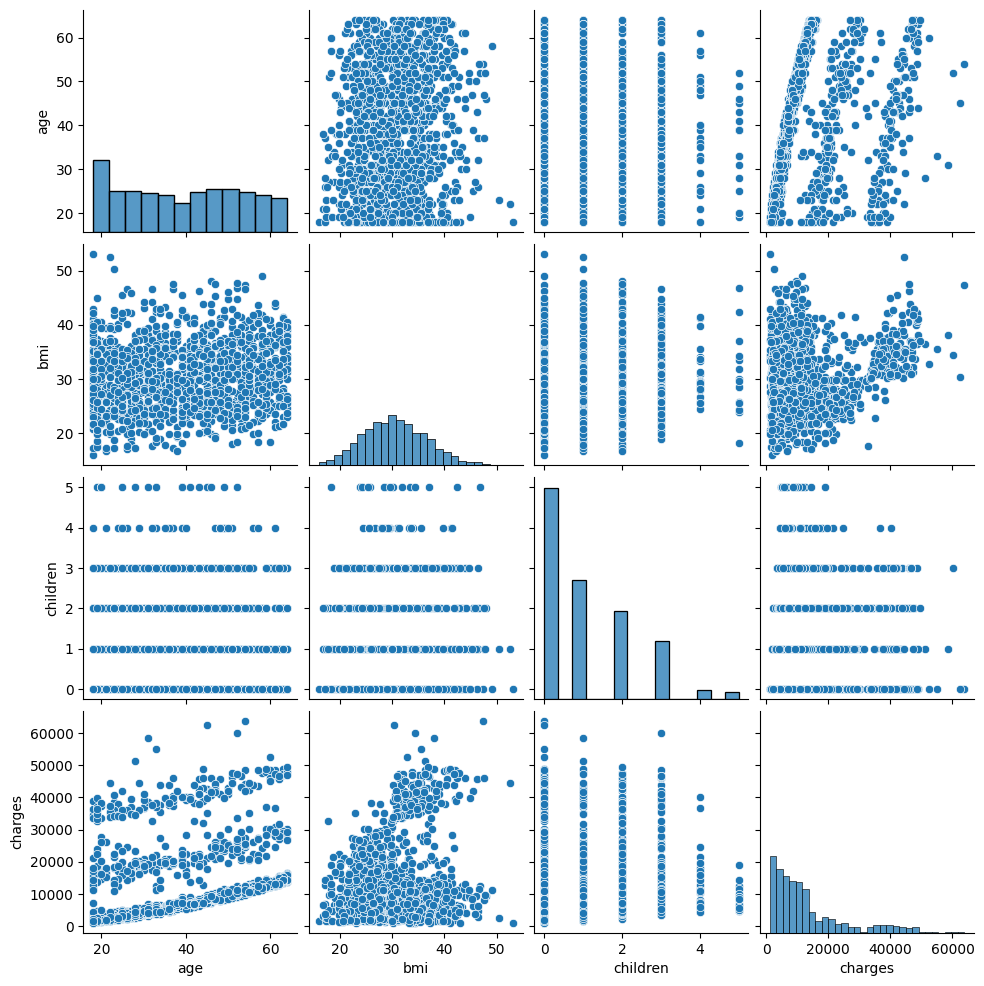

In [77]:
# Scatterplots for joint relationships and checking univariate analysis
sns.pairplot(df_raw)

We can observe some positive correlation between charges and age

### Data preparation

Since this is a small dataset we can try to encode the categorical variables using one hot encoding technique

In [88]:
df_dum = pd.get_dummies(df_raw, columns = ['sex', 'region', 'smoker'])

In [89]:
df_dum.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,True,False,False,False,False,True,False,True
1,18,33.770,1,1725.55230,False,True,False,False,True,False,True,False
2,28,33.000,3,4449.46200,False,True,False,False,True,False,True,False
3,33,22.705,0,21984.47061,False,True,False,True,False,False,True,False
4,32,28.880,0,3866.85520,False,True,False,True,False,False,True,False


In [90]:
# Now we need to split the data into the features or independant variable list and target or dependant variable
X = df_dum.drop('charges', axis = 1)
y = df_dum['charges']

In [92]:
X = np.array(X)
y = np.array(y)

In [93]:
# Additional library
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [97]:
X_train.shape

(1070, 11)

### Model Building

We will first try to build a linear regression model using sklearn's LinearRegression class


In [100]:
# Importing additional libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [101]:
# Fitting our data with the model
LinearRegModel = LinearRegression()

In [103]:
LinearRegModel.fit(X_train, y_train)

LinearRegression()

In [108]:
LinearRegModel_score = LinearRegModel.score(X_test, y_test)
print("Accuracy of Linear Regression Model = ",LinearRegModel_score)

Accuracy of Linear Regression Model =  0.746796161128958


Now we will also try to build a decision tree and Random forest model to do the predictions

In [109]:
# Importing libraries
from sklearn.tree import DecisionTreeRegressor

In [110]:
DecisionTreeModel = DecisionTreeRegressor()

In [111]:
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeRegressor()

In [113]:
DecisionTreeModel_score = DecisionTreeModel.score(X_test, y_test)
print("Accuracy of Decision Tree Model = ",DecisionTreeModel_score)

Accuracy of Decision Tree Model =  0.6978930623332613


We will now try using a Random Forest Regressor and also use the Grid Search 

In [149]:
# Importing libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid = {
    'n_estimators' : [5, 10, 30],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [152]:
RandomForestRegModel = RandomForestRegressor()

In [153]:
grid_search = GridSearchCV(RandomForestRegModel, param_grid = param_grid, cv= 5)

In [154]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 30]})

In [155]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 30}

In [156]:
best_params = grid_search.best_params_

In [157]:
RandomForestRegModel = RandomForestRegressor(**best_params)

In [158]:
RandomForestRegModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=30)

In [159]:
RandomForestRegModel_score = RandomForestRegModel.score(X_test, y_test)
print("Accuracy of Decision Tree Model = ",RandomForestRegModel_score)

Accuracy of Decision Tree Model =  0.8571684460542175


Now we are going to build the XGBoost regressor model for predicting the charges

In [161]:
# Importing libraries
from xgboost import XGBRegressor

In [168]:
param_grid = {
    'n_estimators' : [5, 10, 30],
    'max_depth' : [5, 10, 15]
}

In [169]:
XGBRegressorModel = XGBRegressor()

In [170]:
gridSearch = GridSearchCV(XGBRegressorModel,  param_grid = param_grid, cv= 5)

In [171]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [5, 10, 15], 'n_estimators': [5, 10, 30]})

In [173]:
best_params = gridSearch.best_params_

In [174]:
XGBRegressorModel = XGBRegressor(**best_params)

In [175]:
XGBRegressorModel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [178]:
XGBRegressorModel.score(X_test, y_test)

0.8501963335000873

Lets try to visualize the predicted results of the XGBoostRegressor Model and the Linear Regressor model

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Charges'),
 Text(0, 0.5, 'Actual Charges')]

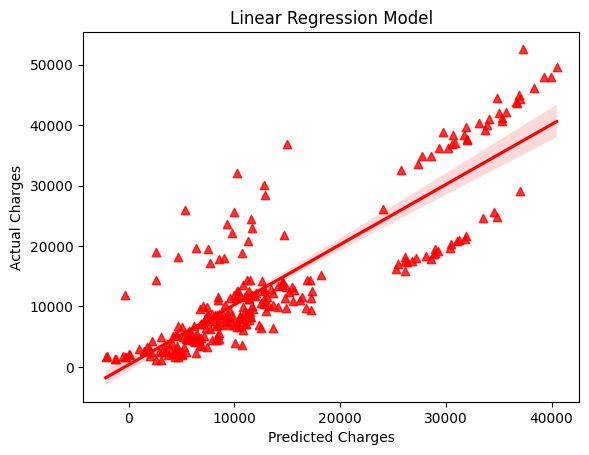

In [182]:
y_predict_linear = LinearRegModel.predict(X_test)

fig = sns.regplot(x = y_predict_linear, y = y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", 
        xlabel = "Predicted Charges", 
        ylabel = "Actual Charges")

[Text(0.5, 1.0, 'XGB Regression Model'),
 Text(0.5, 0, 'Predicted Charges'),
 Text(0, 0.5, 'Actual Charges')]

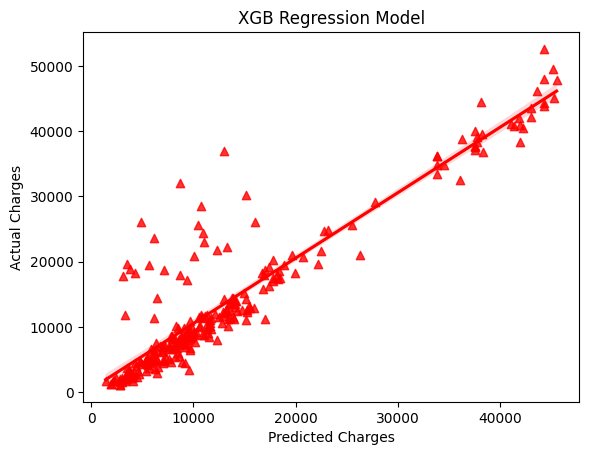

In [184]:
y_predict_xgb = XGBRegressorModel.predict(X_test)

fig = sns.regplot(x = y_predict_xgb, y = y_test, color = 'red', marker = "^")
fig.set(title = "XGB Regression Model", 
        xlabel = "Predicted Charges", 
        ylabel = "Actual Charges")